• Importing packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

• Checking the csv file from Kaggle website

In [2]:
df_winners = pd.read_csv("winners.csv", sep=",", decimal=".")
display(df_winners)

,Grand Prix,Date,Winner,Car,Laps,Time,Name Code
0,Great Britain,1950-05-13,Nino Farina,Alfa Romeo,70.0,2:13:23.600,FAR
1,Monaco,1950-05-21,Juan Manuel Fangio,Alfa Romeo,100.0,3:13:18.700,FAN
2,Indianapolis 500,1950-05-30,Johnnie Parsons,Kurtis Kraft Offenhauser,138.0,2:46:55.970,PAR
3,Switzerland,1950-06-04,Nino Farina,Alfa Romeo,42.0,2:02:53.700,FAR
4,Belgium,1950-06-18,Juan Manuel Fangio,Alfa Romeo,35.0,2:47:26.000,FAN
...,...,...,...,...,...,...,...
1105,Saudi Arabia,2024-03-09,Max Verstappen,Red Bull Racing Honda RBPT,50.0,1:20:43.273,VER
1106,Australia,2024-03-24,Carlos Sainz,Ferrari,58.0,1:20:26.843,SAI
1107,Japan,2024-04-07,Max Verstappen,Red Bull Racing Honda RBPT,53.0,1:54:23.566,VER
1108,China,2024-04-21,Max Verstappen,Red Bull Racing Honda RBPT,56.0,1:40:52.554,VER


• Column Chart - Number of wins per driver with 25 or more wins

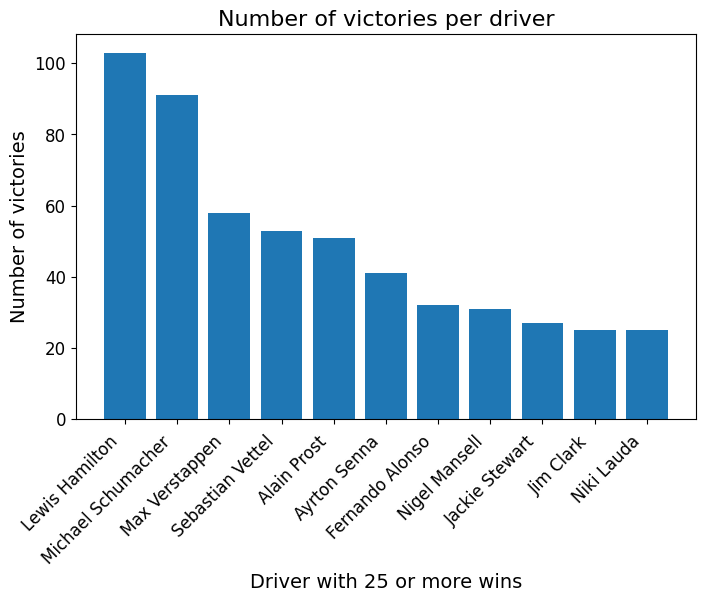

In [3]:
df_winners['Winner'] = df_winners['Winner'].str.replace('  ', ' ')

df_victories = df_winners['Winner'].value_counts().reset_index()
df_victories.columns = ['Drivers', 'Number of Victories']

df_filtered_victories = df_victories[df_victories['Number of Victories'] >= 25]

plt.figure(figsize=(8, 5))
plt.bar(df_filtered_victories['Drivers'], df_filtered_victories['Number of Victories'])
plt.title("Number of victories per driver", fontsize=16)
plt.xlabel("Driver with 25 or more wins", fontsize=14)
plt.ylabel("Number of victories", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.show()

• Time Series Chart - Number of Grands Prix from 1950 to 2023

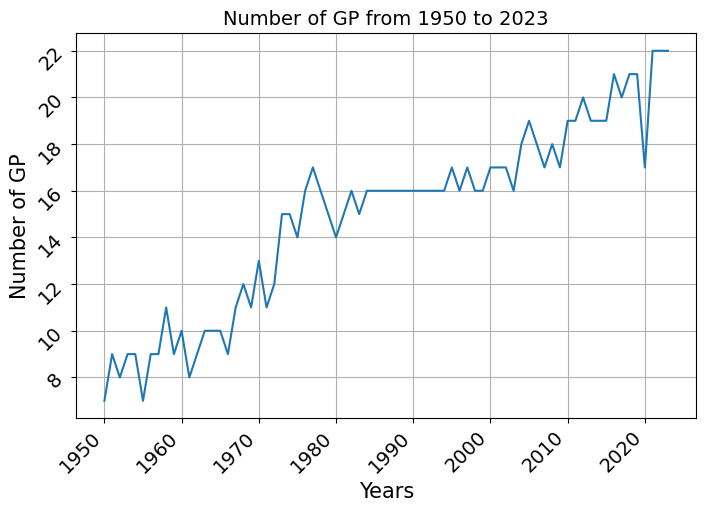

In [4]:

df_winners['Date'] = pd.to_datetime(df_winners['Date'])
df_winners['Year'] = df_winners['Date'].dt.year

df_winners = df_winners[df_winners['Year'] <= 2023]

number_of_races = df_winners['Year'].value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.plot(number_of_races.index, number_of_races.values)
plt.title("Number of GP from 1950 to 2023", fontsize=14)
plt.xlabel("Years", fontsize=15)
plt.ylabel("Number of GP", fontsize=15)
plt.xticks(rotation=45, ha="right", fontsize=14)
plt.yticks(rotation=45, ha="right", fontsize=14)
plt.grid(True)
plt.show()

• Sector Chart - Percentage of drivers' victory in 1991

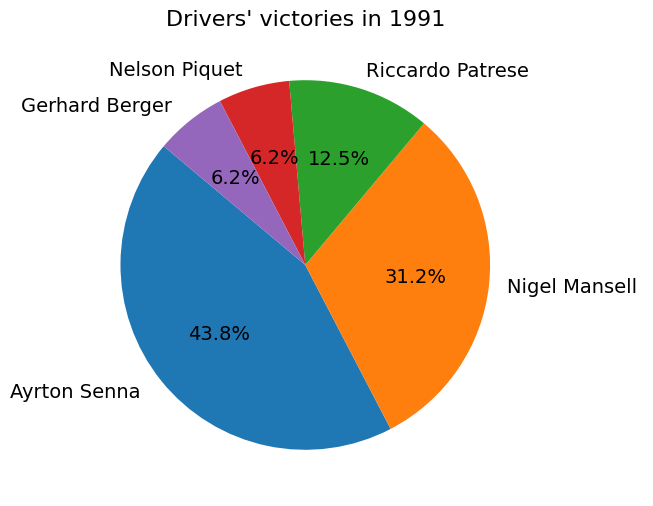

In [5]:

df_1991 = df_winners[df_winners['Date'].dt.year == 1991]
victories_1991 = df_1991['Winner'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(victories_1991, labels=victories_1991.index, autopct='%1.1f%%', startangle=140, textprops={"fontsize":14})
plt.title("Drivers' victories in 1991", fontsize=16)
plt.show()